In [ ]:
# opencv 人脸区域辨识
# SVC 算法，可以识别人脸，叫什么，是谁，训练
# 打卡机，人脸对比

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets

from sklearn.svm import SVC

In [2]:
faces = datasets.fetch_lfw_people(min_faces_per_person=70,resize=1)
faces

{'data': array([[253.66667 , 253.66667 , 254.66667 , ...,  86.666664,  86.333336,
          86.333336],
        [ 42.      ,  34.      ,  31.666666, ..., 121.666664, 148.      ,
         185.33333 ],
        [ 94.      ,  72.      ,  74.      , ..., 182.66667 , 183.      ,
         182.33333 ],
        ...,
        [ 84.333336,  86.      ,  85.333336, ...,  44.      ,  35.666668,
          30.333334],
        [ 49.666668,  50.333332,  47.666668, ..., 178.66667 , 167.66667 ,
         127.333336],
        [ 31.333334,  33.333332,  26.666666, ...,  47.666668,  63.      ,
          99.      ]], dtype=float32),
 'images': array([[[253.66667 , 253.66667 , 254.66667 , ...,  42.333332,
           37.666668,  39.      ],
         [254.      , 254.      , 253.66667 , ...,  43.333332,
           38.      ,  39.      ],
         [254.66667 , 254.33333 , 253.33333 , ...,  44.      ,
           38.666668,  38.      ],
         ...,
         [ 68.333336,  63.333332,  51.      , ...,  90.333336,
     

In [3]:
X = faces['data']

y = faces['target']

names = faces.target_names

In [4]:
image = faces['images']

image.shape

(1288, 125, 94)

3


'George W Bush'

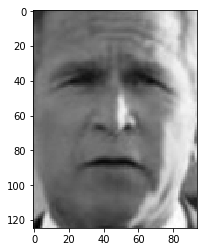

In [17]:
index = np.random.randint(1288,size = 1)[0]

plt.imshow(image[index],cmap = plt.cm.gray)

print(y[index])

names[y[index]]

In [12]:
X.shape

(1288, 11750)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
%%time
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

svc = SVC(kernel='rbf')

svc.fit(X_train,y_train)

print(svc.score(X_test,y_test))

0.3875968992248062
Wall time: 50.4 s


In [18]:
from sklearn.decomposition import PCA

In [37]:
# 主成分分析
# Principal component analysis (PCA)
# whiten = True 白化，归一化
pca = PCA(n_components=0.9,whiten = True)

# 代表原来的数据，经过矩阵运算，结果属性看不懂（属性，没有实际的物理意义），脱敏数据
X_pca = pca.fit_transform(X)

X_pca.shape

(1288, 116)

In [38]:
X_pca.std(axis = 0)

array([0.9996117 , 0.9996118 , 0.99961144, 0.9996118 , 0.99961126,
       0.99961203, 0.9996116 , 0.9996118 , 0.99961144, 0.9996116 ,
       0.99961156, 0.9996118 , 0.9996118 , 0.99961156, 0.99961156,
       0.99961156, 0.9996119 , 0.99961174, 0.9996118 , 0.99961203,
       0.99961174, 0.9996118 , 0.9996121 , 0.9996121 , 0.99961215,
       0.9996118 , 0.99961203, 0.9996118 , 0.9996119 , 0.9996123 ,
       0.99961203, 0.9996118 , 0.99961174, 0.99961174, 0.99961185,
       0.9996118 , 0.99961174, 0.99961174, 0.99961174, 0.9996117 ,
       0.9996118 , 0.9996118 , 0.9996118 , 0.9996123 , 0.9996118 ,
       0.999612  , 0.99961203, 0.9996119 , 0.99961185, 0.99961174,
       0.9996117 , 0.9996119 , 0.9996118 , 0.9996118 , 0.99961174,
       0.9996117 , 0.9996119 , 0.99961174, 0.99961156, 0.9996116 ,
       0.9996118 , 0.99961203, 0.99961174, 0.9996115 , 0.9996116 ,
       0.9996116 , 0.9996116 , 0.9996118 , 0.99961174, 0.9996122 ,
       0.99961156, 0.9996116 , 0.99961174, 0.9996115 , 0.99961

In [31]:
%%time
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size = 0.2)

svc = SVC()

svc.fit(X_train,y_train)

print(svc.score(X_test,y_test))

0.4573643410852713
Wall time: 645 ms


In [39]:
%%time
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size = 0.2)

svc = SVC()

svc.fit(X_train,y_train)

print(svc.score(X_test,y_test))

0.8062015503875969
Wall time: 425 ms


In [41]:
for i in range(7):
    print(names[i],(y == i).sum())

Ariel Sharon 77
Colin Powell 236
Donald Rumsfeld 121
George W Bush 530
Gerhard Schroeder 109
Hugo Chavez 71
Tony Blair 144


In [47]:
import imblearn

In [48]:
# 过采样
from imblearn.over_sampling import SMOTE

In [49]:
'''This object is an implementation of SMOTE - Synthetic Minority
Over-sampling Technique as presented in'''
smote = SMOTE()

In [50]:
X2,y2 = smote.fit_resample(X,y)

In [51]:
for i in range(7):
    print(names[i],(y2 == i).sum())

Ariel Sharon 530
Colin Powell 530
Donald Rumsfeld 530
George W Bush 530
Gerhard Schroeder 530
Hugo Chavez 530
Tony Blair 530


In [52]:
pca = PCA(n_components=0.9,whiten=True)

X2_pca = pca.fit_transform(X2)
X2_pca.shape

(3710, 99)

In [53]:
%%time
X_train,X_test,y_train,y_test = train_test_split(X2_pca,y2,test_size = 0.2)

svc = SVC()

svc.fit(X_train,y_train)

print(svc.score(X_test,y_test))

0.9851752021563343
Wall time: 1.34 s


In [54]:
X2.shape

(3710, 11750)

In [56]:
image.shape

(1288, 125, 94)

In [57]:
125*94

11750

In [55]:
%%time
face_train,face_test,X_train,X_test,y_train,y_test = train_test_split(X2,X2_pca,y2,test_size = 0.2)

svc = SVC()

svc.fit(X_train,y_train)

print(svc.score(X_test,y_test))

y_ = svc.predict(X_test)

0.9892183288409704
Wall time: 1.73 s


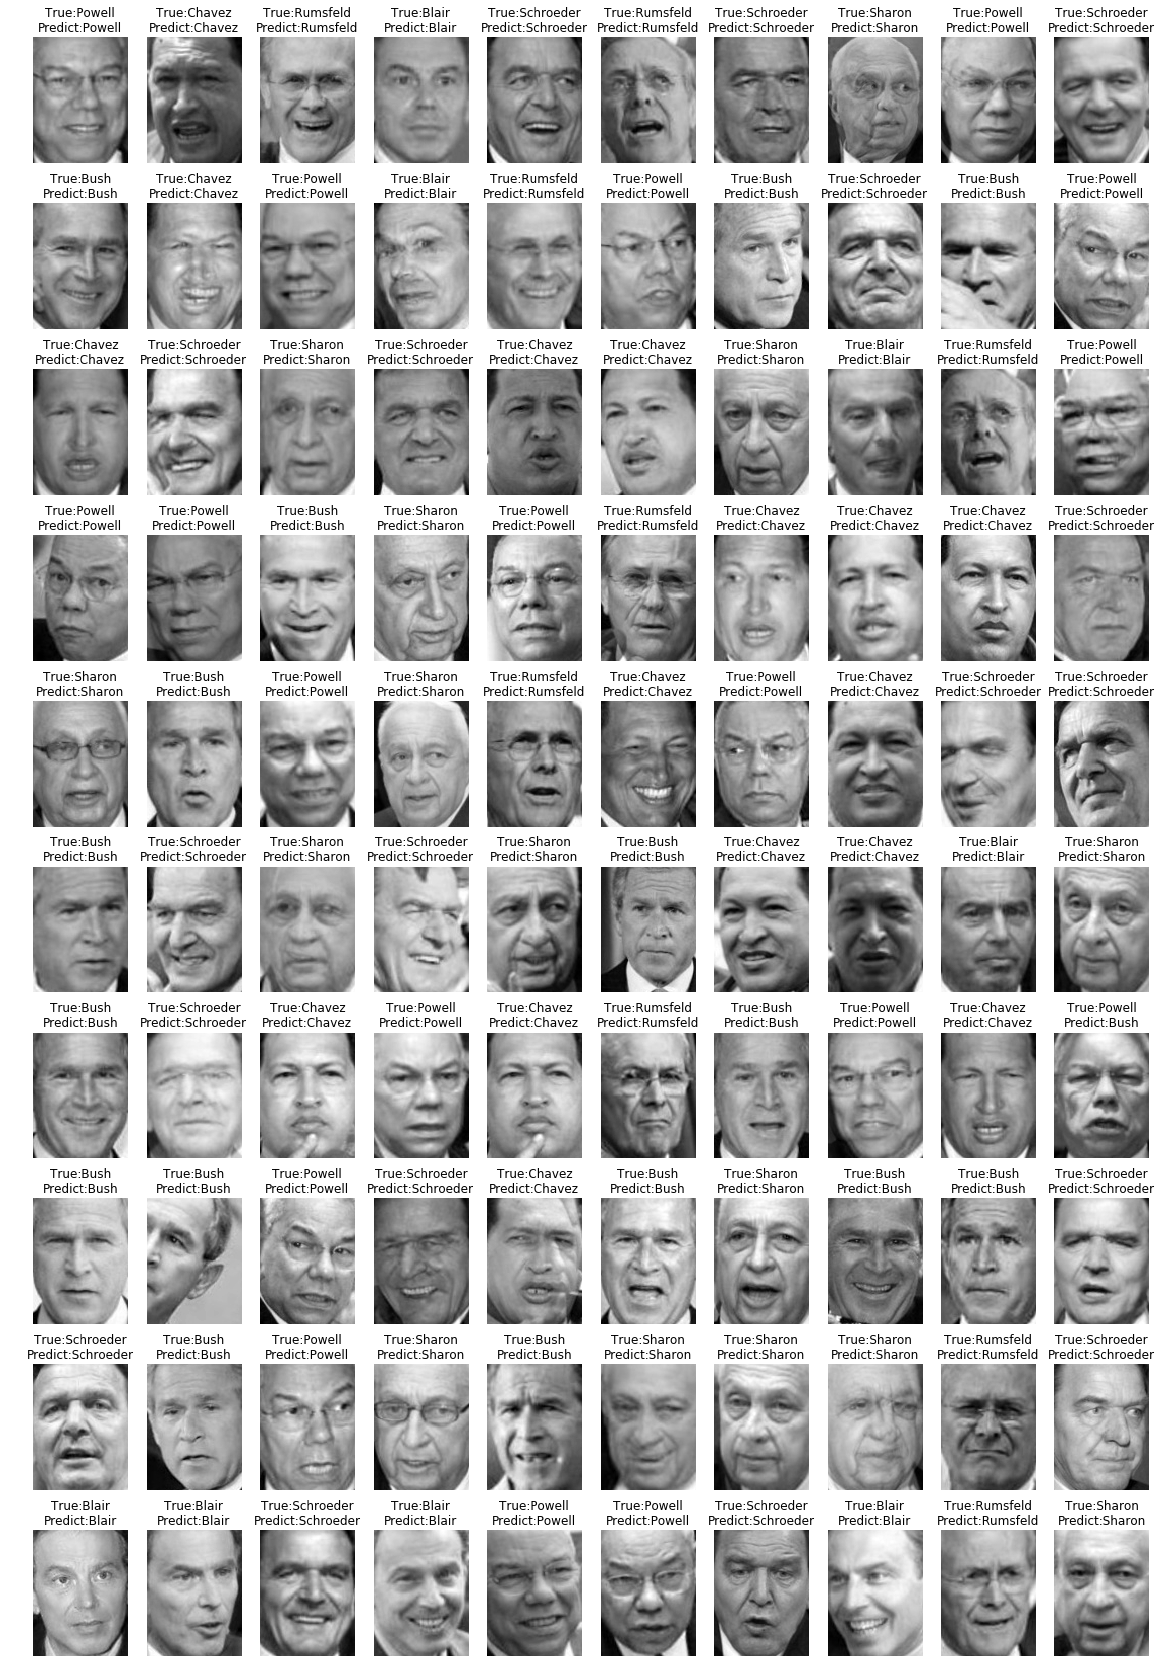

In [59]:
plt.figure(figsize=(10*2,10*3))
for i in range(100):
    
    ax = plt.subplot(10,10,i + 1)
    
    face = face_test[i].reshape(125,94)
    
    ax.imshow(face,cmap = 'gray')
    ax.axis('off')
    t = names[y_test[i]].split(' ')[-1]
    
    p = names[y_[i]].split(' ')[-1]
    
    ax.set_title('True:%s\nPredict:%s'%(t,p))